In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X = np.array([
    [1400, 2, 3],
    [1600, 2, 3],
    [1700, 2, 4],
    [1875, 2, 4],
    [1100, 1, 3],
    [1550, 2, 3],
    [2350, 3, 4],
    [2450, 3, 4],
    [1425, 2, 3],
    [1700, 2, 4]
])

y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [2]:
def hypothesis(X, w):
    return np.dot(X, w)

In [3]:
def mse(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [4]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w = w - learning_rate * gradient
    return w

In [5]:
w = np.zeros(X_b.shape[1])
learning_rate = 1e-9
epochs = 20000
cost_history = []

for i in range(epochs):
    w = gradient_descent_step(X_b, y, w, learning_rate)
    cost = mse(X_b, y, w)
    cost_history.append(cost)

In [7]:
print(w)
print(cost_history[-1])

[  0.1905213  164.14844279   0.24593849   0.45932285]
928067695.5381072


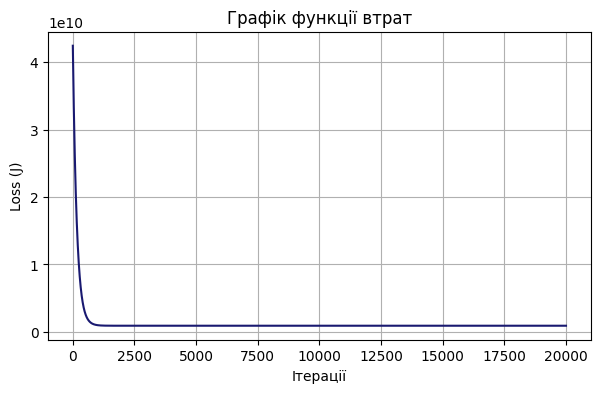

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(range(len(cost_history)), cost_history, color="midnightblue")
plt.xlabel("Ітерації")
plt.ylabel("Loss (J)")
plt.title("Графік функції втрат")
plt.grid(True)
plt.show()

In [9]:
w_2 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_2)

[ 1.03668677e+05  2.87498115e+01  6.46032273e+04 -6.11823254e+02]


In [10]:
model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

103668.67742422689
[ 2.87498115e+01  6.46032273e+04 -6.11823254e+02]


In [12]:
y_pred_custom = hypothesis(X_b, w)
y_pred_analytical = hypothesis(X_b, w_2)
y_pred_sklearn = model.predict(X)

df = pd.DataFrame({
    "Actual": y,
    "GradientDescent": np.round(y_pred_custom, 2),
    "Analytical": np.round(y_pred_analytical, 2),
    "Sklearn": np.round(y_pred_sklearn, 2)
})

display(df)

,Actual,GradientDescent,Analytical,Sklearn
0,245000,229809.88,271289.40,271289.40
1,312000,262639.57,277039.36,277039.36
2,279000,279054.87,279302.52,279302.52
3,308000,307780.85,284333.74,284333.74
4,199000,180565.10,198061.23,198061.23
5,219000,254432.15,275601.87,275601.87
6,405000,385751.61,362593.12,362593.12
7,324000,402166.45,365468.10,365468.10
8,319000,233913.59,272008.14,272008.14
9,255000,279054.87,279302.52,279302.52


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y, y_pred_sklearn))
print("R^2:", r2_score(y, y_pred_sklearn))

MSE: 1199500919.92158
R^2: 0.6320605757820954


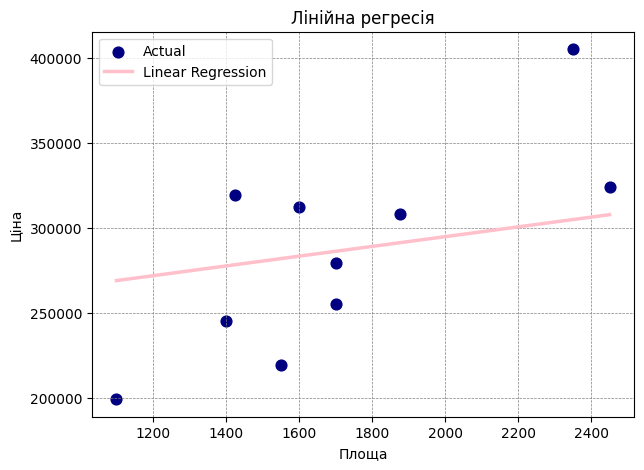

In [29]:
area_min, area_max = X[:, 0].min(), X[:, 0].max()
X_line = np.linspace(area_min, area_max, 100).reshape(-1, 1)

mean_bath = X[:, 1].mean()
mean_bed = X[:, 2].mean()

X_line_full = np.c_[X_line, np.full_like(X_line, mean_bath), np.full_like(X_line, mean_bed)]
y_line = model.predict(X_line_full)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], y, color='navy', s=60, label='Actual')
plt.plot(X_line, y_line, color='pink', linewidth=2.5, label='Linear Regression')
plt.xlabel("Площа")
plt.ylabel("Ціна")
plt.title("Лінійна регресія")
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()
